# 1 Data and package import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme()

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2 Data Inspection

## 2.1 Checking data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2.2 Transforming data

In [6]:
#Change values 0 and 1 to Yes and No in SeniorCitizen for consistent scaling
data['SeniorCitizen'] = data['SeniorCitizen'].map({1:'Yes',0:'No'})

#Change type of TotalCharges from object to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

## 2.3 Checking levels in categorical variables

In [7]:
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        print(f'{col} {data[col].unique()}')

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


## 2.4 Checking missing values

In [8]:
#Check NA´s
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Inspect NA´s in dataframe
# data[data.TotalCharges.isna()]

In [10]:
#Insprect total charges when tenure=1
# data[data.tenure == 1]

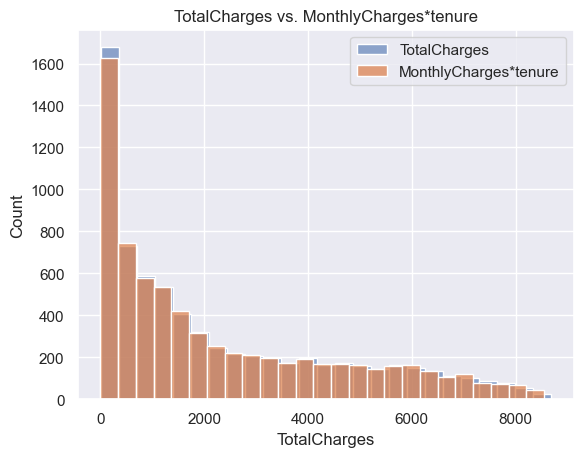

In [11]:
#Relationship total charges with monthlycharges * tenure
sns.histplot(data.TotalCharges,alpha=0.6,label='TotalCharges')
sns.histplot(data.MonthlyCharges*data.tenure,label='MonthlyCharges*tenure')
plt.title('TotalCharges vs. MonthlyCharges*tenure')
plt.legend()
plt.show()

In [12]:
#Replace monthly and total charges values with 0 where tenure = 0
data.loc[data['tenure'] == 0, 'MonthlyCharges'] = 0
data.loc[data['TotalCharges'].isna(), 'TotalCharges'] = 0

All Na´s in total charges have a monthly charges of 0. When you check the total charges with tenure == 1, total charges is the product of monthly charges times tenure. Its unclear why customers with tenure = 0 already have monthly charges when the total charges with tenure = 1 is the same as in monthly charges. Therefore Na´s and monthly charges in tenure = 0 will be replaced by 0.

In [13]:
data.shape

(7043, 21)

## 2.5 Checking duplicates

In [14]:
data.duplicated().sum()

0

## 2.6 Checking outliers

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

monthlycharges_scaled = scaler.fit_transform(data['MonthlyCharges'].values.reshape(-1,1))
totalcharges_scaled = scaler.fit_transform(data['TotalCharges'].values.reshape(-1,1))

print('MonthlyCharges Min:',np.min(monthlycharges_scaled))
print('MonthlyCharges Max:',np.max(monthlycharges_scaled))
print('TotalCharges Min:',np.min(totalcharges_scaled))
print('Totalcharges Max:',np.max(totalcharges_scaled))

MonthlyCharges Min: -2.14448310610798
MonthlyCharges Max: 1.7916708522356617
TotalCharges Min: -1.005779833710855
Totalcharges Max: 2.825805577868443


## 2.7 Delete reduntant variables

In [16]:
#Delete customerID - reduntant variable
data = data.drop('customerID',axis=1)

# 3 Churn Analysis

## 3.1 Churn Rate

 Customers who have a one year contract churn within their minimal contract duration. Its unclear why. Therefore it is assumend that these customers are outliers and will be deleted for data consistency.

In [17]:
# Proportion of customers with a one year contract, which churn within minimal contract duration
np.divide(data[(data.tenure <= 12) & (data.Churn == 'Yes') & (data.Contract == 'One year')]['Contract'].count(),
          data[(data.Churn == 'Yes') & (data.Contract == 'One year')]['Contract'].count()).round(2)

0.08

In [18]:
# Delete customers with a one year contract and churn within minimal contract duration
data = data[~((data.tenure <= 12) & (data.Churn == 'Yes') & (data.Contract == 'One year'))]

In [19]:
#Total Churn
(data[data.Churn == 'Yes']['Churn'].count() / len(data)).round(2)

0.26

In [20]:
#Total Churn Rate per month
(data[data.Churn == 'Yes']['Churn'].count() / 72).round()

26.0

In [21]:
# Churn Rate per Contract type
(data[data.Churn == 'Yes']['Contract'].value_counts() / data.Contract.value_counts()).round(2)

Contract
Month-to-month    0.43
One year          0.10
Two year          0.03
Name: count, dtype: float64

## 3.3 Distribution Churn among tenure

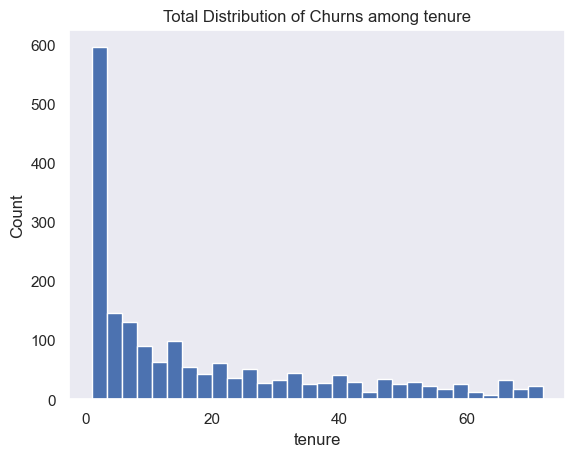

In [22]:
# Distribution churn among tenure
plt.hist(data=data[data.Churn == 'Yes'],x='tenure',bins=30)
plt.xticks(ticks=np.arange(min(data.tenure),max(data.tenure),3))
plt.title('Total Distribution of Churns among tenure')
plt.xlabel('tenure')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0,72,20))
plt.grid()
plt.show()

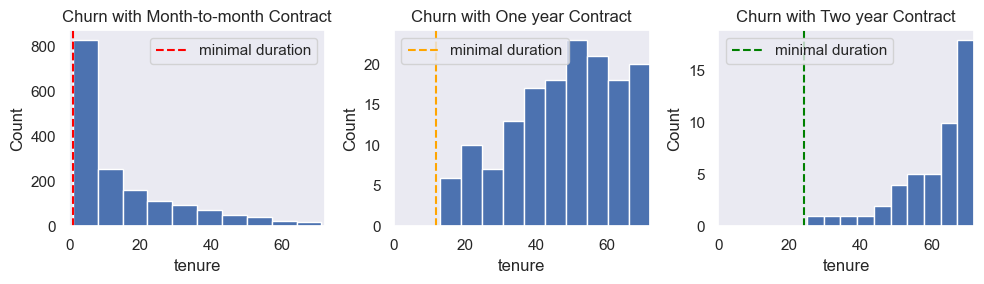

In [23]:
#Churn Distribution among Contract Types and
contract_types = ('Month-to-month','One year','Two year')

plt.figure(figsize=(10,3))
for i, contract_type in enumerate(contract_types):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[(data.Churn == 'Yes') & (data.Contract == contract_type)]['tenure'], bins=10)
    plt.title(f'Churn with {contract_type} Contract')
    plt.xlabel('tenure')
    plt.ylabel('Count')
    plt.grid()
    plt.xlim(0,72)

    if contract_type == 'Month-to-month':
        plt.axvline(1,color='red',linestyle='--',label='minimal duration')
    elif contract_type == 'One year':
        plt.axvline(12,color='orange',linestyle='--',label='minimal duration')
    else:
        plt.axvline(24,color='green',linestyle='--',label='minimal duration')
    plt.legend()
  
plt.tight_layout()
plt.show()

In [24]:
#Scaling tenure to compare churn rates per contract type considering their minimal duration

#Month to month contract
data_month_to_month = data[(data.Contract == 'Month-to-month') & (data.Churn == 'Yes')].copy()
data_month_to_month['tenure_scaled'] = data_month_to_month['tenure']

#One year contract
data_one_year = data[(data.Contract == 'One year') & (data.Churn == 'Yes')].copy()
data_one_year['tenure_scaled'] = data_one_year['tenure'] - 12

#two year contract
data_two_years = data[(data.Contract == 'Two year') & (data.Churn == 'Yes')].copy()
data_two_years['tenure_scaled'] = data_two_years['tenure'] - 24

print('Median Churn rate month to month:',data_month_to_month['tenure_scaled'].median())
print('Median Churn rate one year:',data_one_year['tenure_scaled'].median())
print('Median Churn rate two year:',data_two_years['tenure_scaled'].median())

Median Churn rate month to month: 7.0
Median Churn rate one year: 39.0
Median Churn rate two year: 41.5


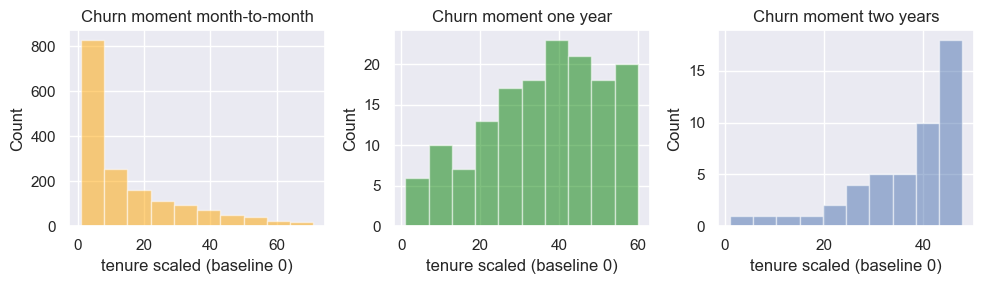

In [25]:
fig, ax = plt.subplots(1,3,figsize=(10,3))

#Subplot 1: month-to-month
data_month_to_month['tenure_scaled'].hist(alpha=0.5,label='Month-to-month',bins=10,ax=ax[0],color = 'orange')
ax[0].set_title('Churn moment month-to-month')
ax[0].set_xlabel('tenure scaled (baseline 0)')
ax[0].set_ylabel('Count')

#Subplot 2: one year
data_one_year['tenure_scaled'].hist(alpha=0.5,label='One Year',bins=10,ax=ax[1],color = 'green')
ax[1].set_title('Churn moment one year')
ax[1].set_xlabel('tenure scaled (baseline 0)')
ax[1].set_ylabel('Count')

#Subplot 3: two years
data_two_years['tenure_scaled'].hist(alpha=0.5,label='Two Years',bins=10,ax=ax[2])
ax[2].set_title('Churn moment two years')
ax[2].set_xlabel('tenure scaled (baseline 0)')
ax[2].set_ylabel('Count')


plt.tight_layout()

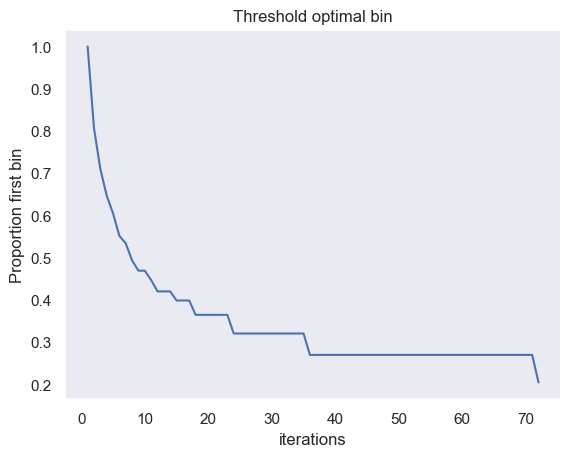

In [26]:
#Finding threshold for optimal bin
data_bins = data.copy()
data_bins = data_bins[data_bins.Churn == 'Yes']

results = []
bins = np.arange(1,73,1)

for i in bins:
    data_bins['tenure_bin'] = pd.cut(x=data_bins['tenure'],bins=i)
    value_counts = data_bins.tenure_bin.value_counts(normalize=True)
    results.append(value_counts.iloc[0])

plt.plot(bins,results)
plt.xlabel('iterations')
plt.ylabel('Proportion first bin')
plt.title('Threshold optimal bin')
plt.grid()

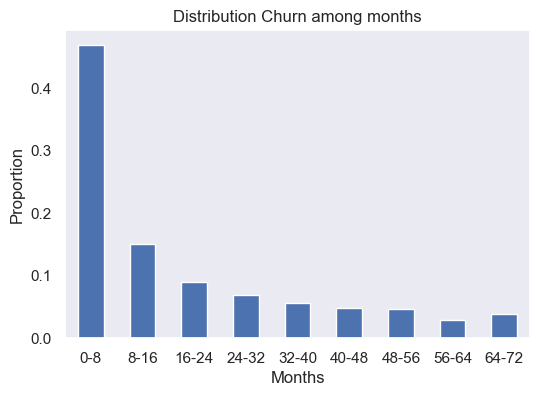

In [27]:
##Binning tenure with practical bin
data_bins['tenure_bin'] = pd.cut(x=data_bins['tenure'],bins=np.arange(0,73,8),labels=['0-8','8-16','16-24','24-32','32-40','40-48','48-56','56-64','64-72'])
plt.figure(figsize=(6,4))
data_bins.tenure_bin.value_counts(normalize=True).sort_index().plot.bar()
plt.title('Distribution Churn among months')
plt.ylabel('Proportion')
plt.xlabel('Months')
plt.grid('')
plt.xticks(rotation=0)
plt.show()

In [28]:
data_bins.tenure_bin.value_counts(normalize=True).sort_index().round(2)

tenure_bin
0-8      0.47
8-16     0.15
16-24    0.09
24-32    0.07
32-40    0.06
40-48    0.05
48-56    0.05
56-64    0.03
64-72    0.04
Name: proportion, dtype: float64

# 4 Correlation Analysis

In [29]:
#Define Cramers´s V

from scipy.stats import chi2_contingency

def cramersv (x,y):

    #Chi2
    chi2_conting = pd.crosstab(x,y)
    chi2, p, _, _ = chi2_contingency(chi2_conting)

    #CramersV
    n = chi2_conting.sum().sum()
    r, k = chi2_conting.shape
    m = min(r - 1, k - 1)
    v = np.sqrt(chi2 / (n * m))
    
    return v,p

## 4.1 Distribution Churn by categorical variables

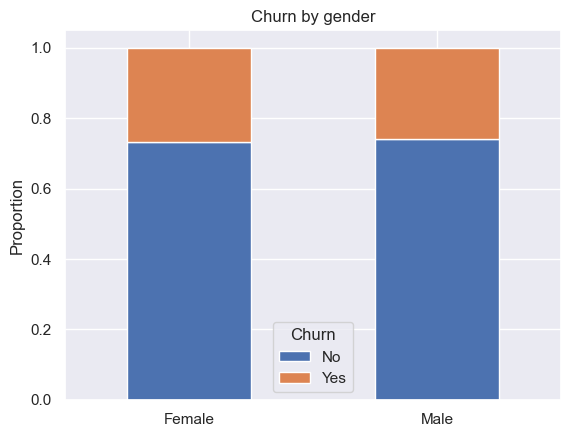

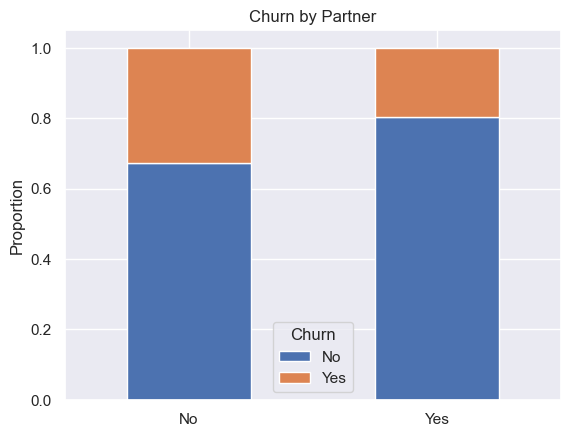

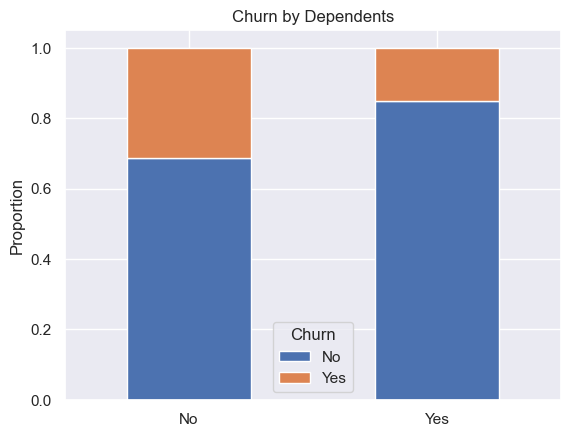

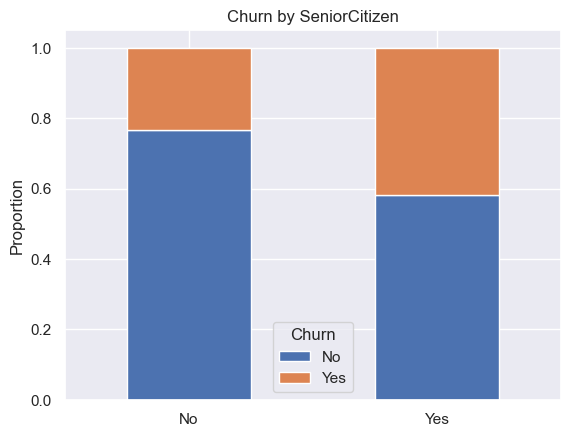

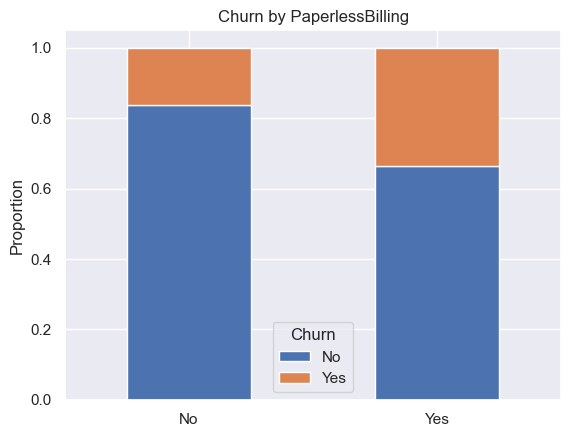

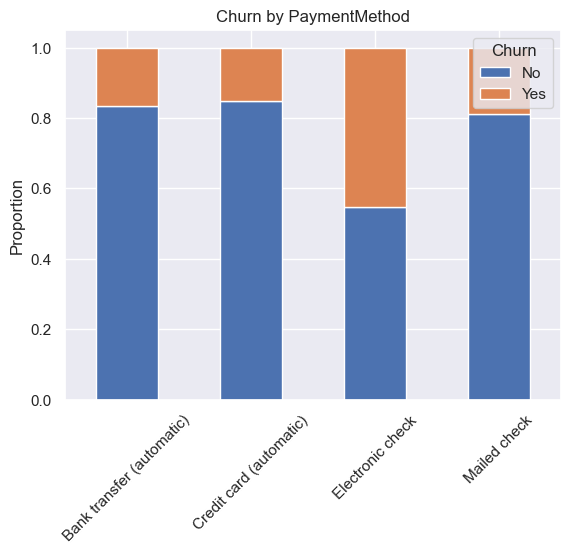

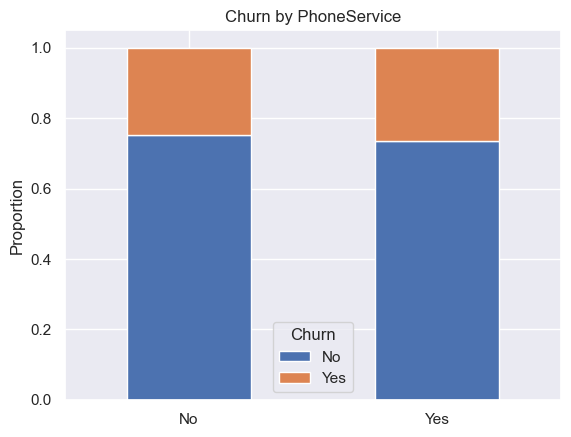

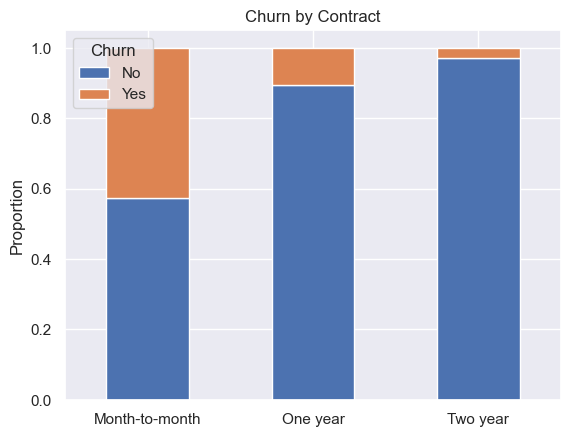

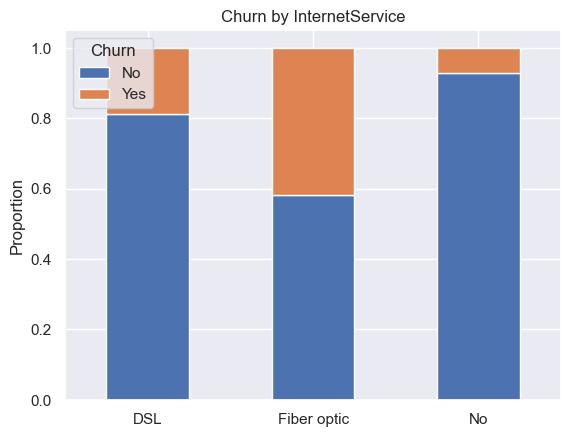

In [30]:
for col in ['gender','Partner','Dependents','SeniorCitizen','PaperlessBilling','PaymentMethod','PhoneService','Contract','InternetService']:
    data.groupby(col)['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.xticks(rotation=0 if col != 'PaymentMethod' else 45)
    plt.title(f'Churn by {col}')
    plt.ylabel('Proportion')
    plt.xlabel('')


In [31]:
''' 
fig, ax = plt.subplots(1,2,figsize=(10,4))
data.groupby('InternetService')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True,ax=ax[0])
ax[0].tick_params(axis='x',rotation=0)
ax[0].set_title('Absolute and Churn Distribution Internet Service')
ax[0].set_xlabel('')
ax[0].grid('')
ax[0].set_ylabel('Count')
data.groupby('Contract')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True,ax=ax[1])
ax[1].tick_params(axis='x',rotation=0)
ax[1].set_title('Absolute and Churn Distribution Contract')
ax[1].set_xlabel('')
ax[1].set_ylabel('Count')
ax[1].grid('')

plt.tight_layout()

'''


" \nfig, ax = plt.subplots(1,2,figsize=(10,4))\ndata.groupby('InternetService')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True,ax=ax[0])\nax[0].tick_params(axis='x',rotation=0)\nax[0].set_title('Absolute and Churn Distribution Internet Service')\nax[0].set_xlabel('')\nax[0].grid('')\nax[0].set_ylabel('Count')\ndata.groupby('Contract')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True,ax=ax[1])\nax[1].tick_params(axis='x',rotation=0)\nax[1].set_title('Absolute and Churn Distribution Contract')\nax[1].set_xlabel('')\nax[1].set_ylabel('Count')\nax[1].grid('')\n\nplt.tight_layout()\n\n"

### 4.1.1 Correlation Churn by categorical variables

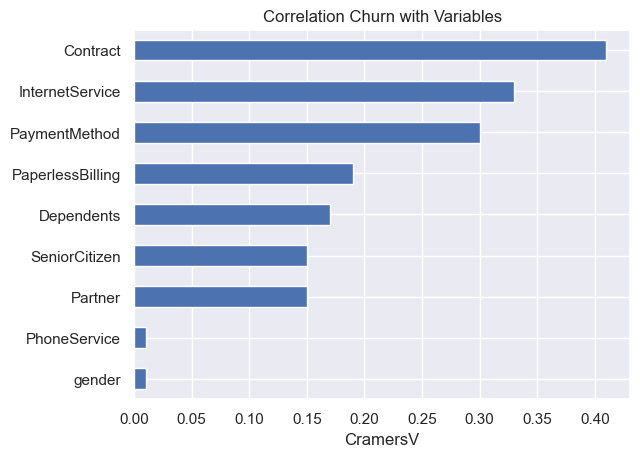

           Variable  CramersV  p-value
0          Contract      0.41   0.0000
1   InternetService      0.33   0.0000
2     PaymentMethod      0.30   0.0000
3  PaperlessBilling      0.19   0.0000
4        Dependents      0.17   0.0000
5           Partner      0.15   0.0000
6     SeniorCitizen      0.15   0.0000
7            gender      0.01   0.4504
8      PhoneService      0.01   0.3128


In [32]:
#CramersV, p-value for categorical variables
var_churn_list = []

for col in ['gender','Partner','Dependents','SeniorCitizen','PaperlessBilling','PaymentMethod','PhoneService','Contract','InternetService']:
    v,p = cramersv(data[col],data['Churn'])
    var_churn_list.append({'Variable':col,'CramersV':v.round(2),'p-value':p.round(4)})

#DataFrame
var_churn_df = pd.DataFrame(var_churn_list).sort_values(by='CramersV',ascending=False).reset_index(drop=True)
var_churn_df.sort_values(by='CramersV').plot.barh(x='Variable',y='CramersV',legend=False)
plt.title('Correlation Churn with Variables')
plt.xlabel('CramersV')
plt.ylabel('')
plt.show()

print(var_churn_df)

### 4.1.2 Correlation Matrix

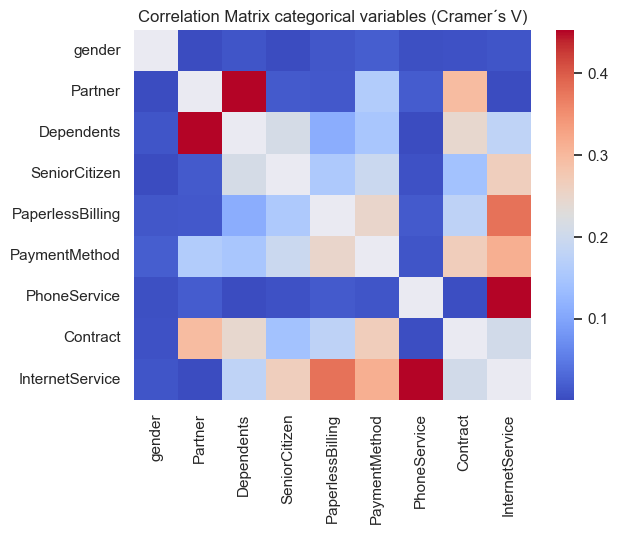

In [33]:
from itertools import combinations

cat_var_list = ['gender','Partner','Dependents','SeniorCitizen','PaperlessBilling','PaymentMethod','PhoneService','Contract','InternetService']

#Create empty Dataframe
corr_matrix = pd.DataFrame(index=cat_var_list, columns=cat_var_list, dtype=float)

#Iterate throu combinations
for col1, col2 in combinations(cat_var_list, 2):
    v = cramersv(data[col1], data[col2])

    #Append values to Dataframe
    corr_matrix.loc[col1, col2] = v[0]
    corr_matrix.loc[col2, col1] = v[0]

#Plot
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation Matrix categorical variables (Cramer´s V)')
plt.grid('')
plt.show()

## 4.2 Distribution Churn by categorical variables with level no internet service

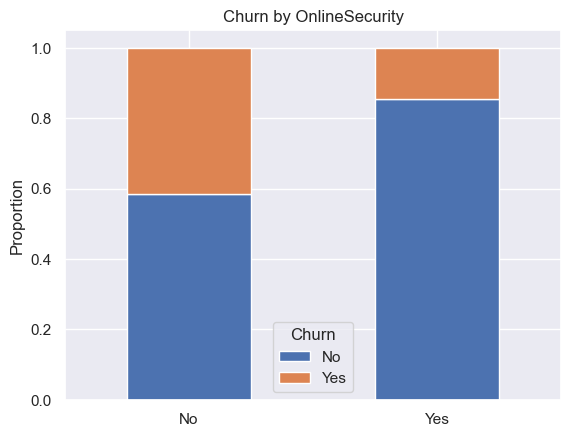

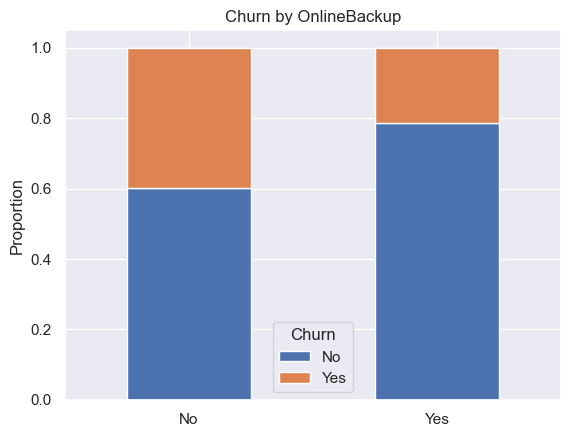

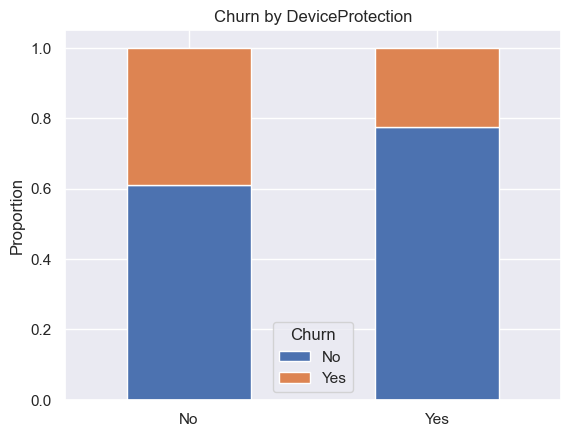

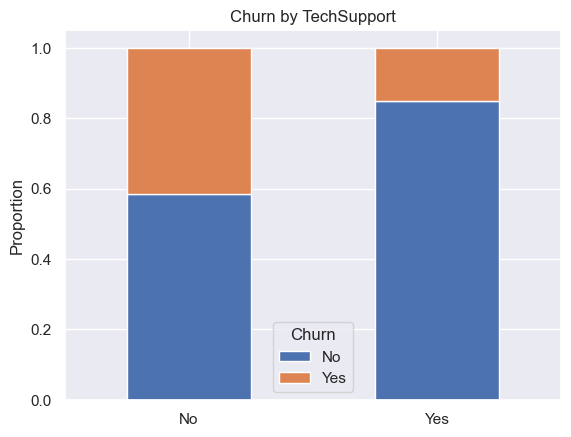

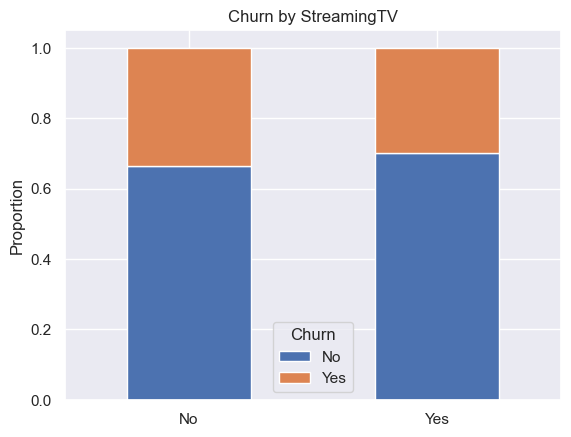

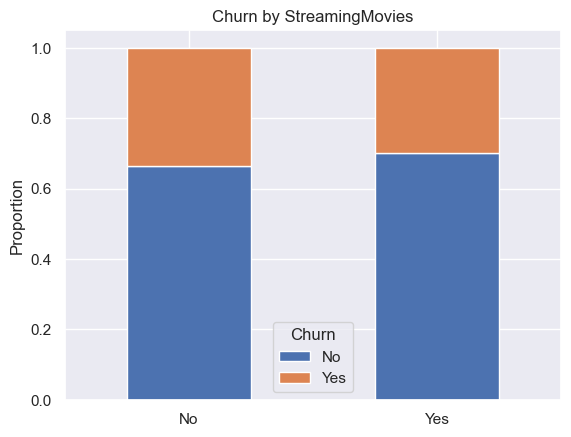

In [34]:
'''
Rows with no internet service were deleted to prevent spurious correlation. 
For example, customers without internet service can not have online backup or online security.
'''

for col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    data[data.InternetService != 'No'].groupby(col)['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.xticks(rotation=0 if col != 'PaymentMethod' else 45)
    plt.title(f'Churn by {col}')
    plt.ylabel('Proportion')
    plt.xlabel('')

### 4.2.1 Correlation Churn by categorical variables with level no internet service

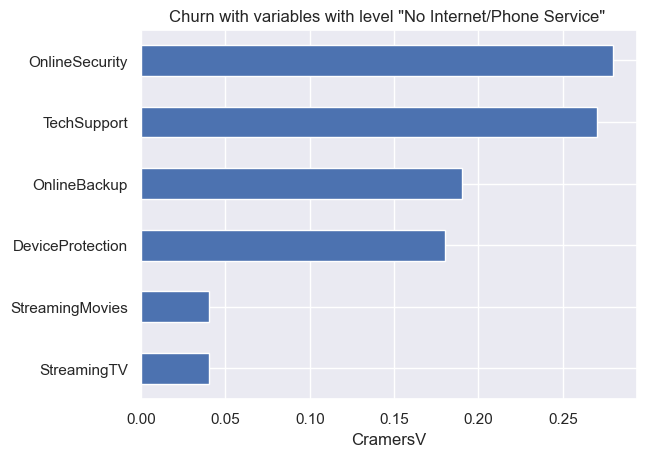

Length data_filter: 5508 of 7030
           Variable  CramersV  p-value
0    OnlineSecurity      0.28   0.0000
1       TechSupport      0.27   0.0000
2      OnlineBackup      0.19   0.0000
3  DeviceProtection      0.18   0.0000
4       StreamingTV      0.04   0.0053
5   StreamingMovies      0.04   0.0029


In [35]:
#Filter data on InternetService not 'No'
data_filter = data[data.InternetService != 'No']

#Subset of data
data_subset = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

#CramersV, p-value for filtered variables
var_churn_list = []
for col in data_subset:
    v,p = cramersv(data_filter[col],data_filter['Churn'])
    var_churn_list.append({'Variable':col,'CramersV':v.round(2),'p-value':p.round(4)})

var_churn_df = pd.DataFrame(var_churn_list).sort_values(by='CramersV',ascending=False).reset_index(drop=True)
var_churn_df.sort_values(by='CramersV').plot.barh(x='Variable',y='CramersV',legend=False)
plt.title('Churn with variables with level "No Internet/Phone Service" ')
plt.xlabel('CramersV')
plt.ylabel('')
plt.show()

print(f'Length data_filter: {len(data_filter)} of {len(data)}')
print(var_churn_df)

In [36]:
'''
columns = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'DeviceProtection']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]
    data.groupby(data[col])['Churn'].value_counts(normalize=True).unstack().plot.bar(stacked=True, ax=ax)
    ax.set_title(f'Churn by {col}')  
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

'''

"\ncolumns = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'DeviceProtection']\nfig, axes = plt.subplots(2, 2, figsize=(10, 8))\n\nfor i, col in enumerate(columns):\n    ax = axes[i // 2, i % 2]\n    data.groupby(data[col])['Churn'].value_counts(normalize=True).unstack().plot.bar(stacked=True, ax=ax)\n    ax.set_title(f'Churn by {col}')  \n    ax.tick_params(axis='x', rotation=0)\n    ax.set_xlabel('')\n    ax.set_ylabel('Proportion')\n    ax.legend(loc='lower right')\n\nplt.tight_layout()\nplt.show()\n\n"

### 4.2.2 Correlation Matrix

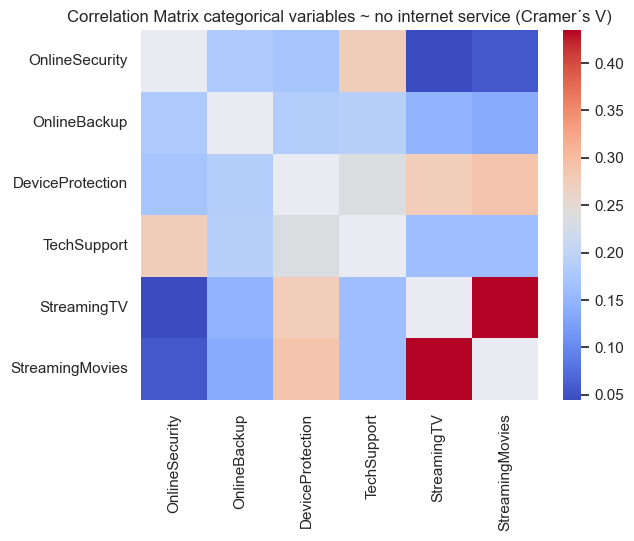

In [37]:
from itertools import combinations

#Create empty Dataframe
corr_matrix = pd.DataFrame(index=data_subset, columns=data_subset, dtype=float)

#Iterate throu combinations
for col1, col2 in combinations(data_subset, 2):
    v = cramersv(data_filter[col1], data_filter[col2])

    #Append values to Dataframe
    corr_matrix.loc[col1, col2] = v[0]
    corr_matrix.loc[col2, col1] = v[0]

#Plot
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.ylabel('')
plt.xlabel('')
plt.grid('')
plt.title('Correlation Matrix categorical variables ~ no internet service (Cramer´s V)')
plt.show()

## 4.3 Distribution Churn by categorical variables ~ tenure <= 8 months

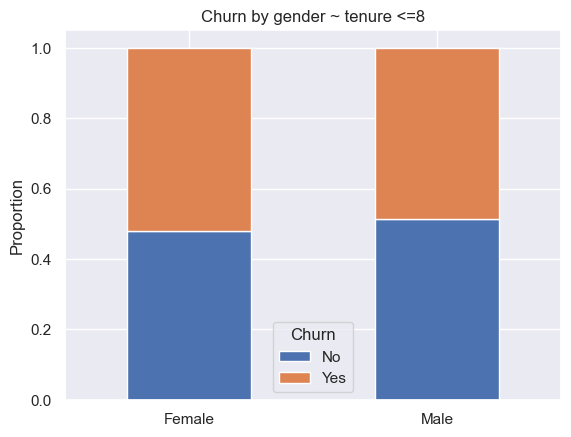

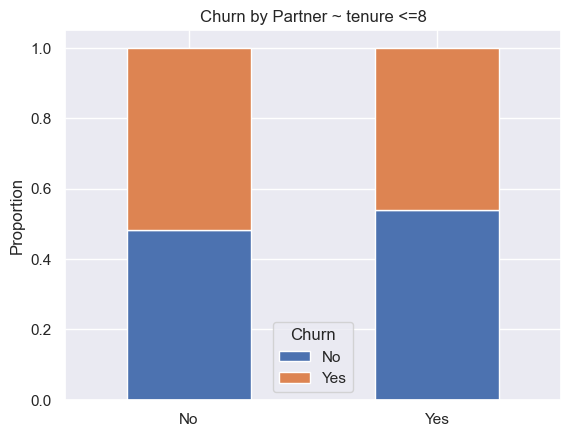

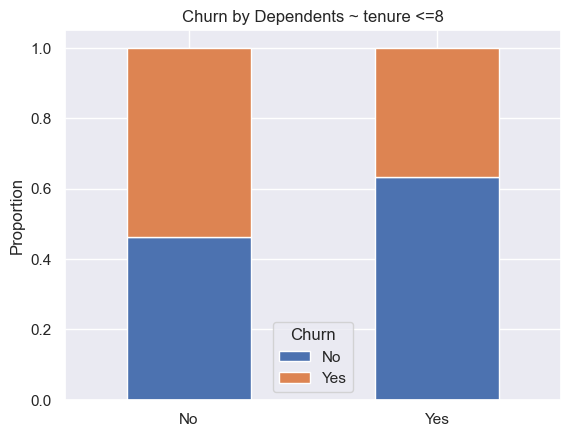

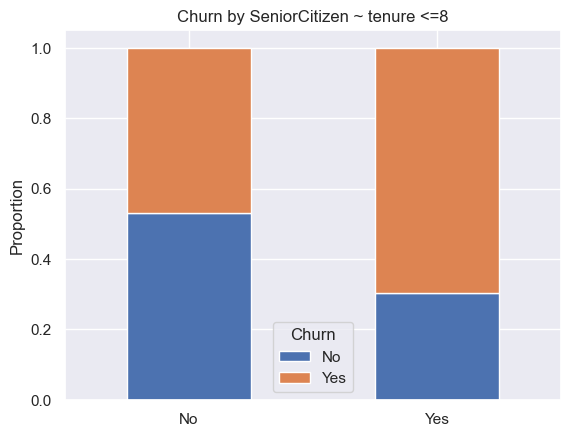

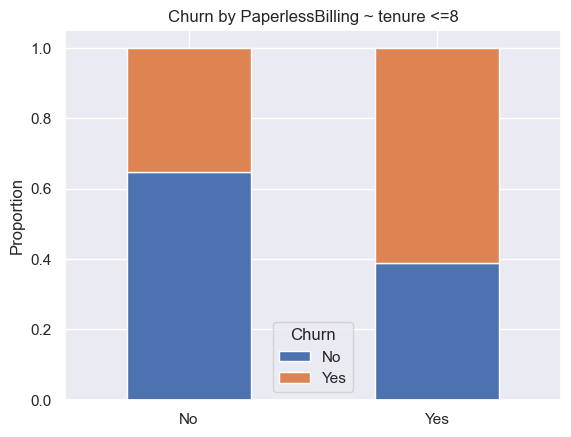

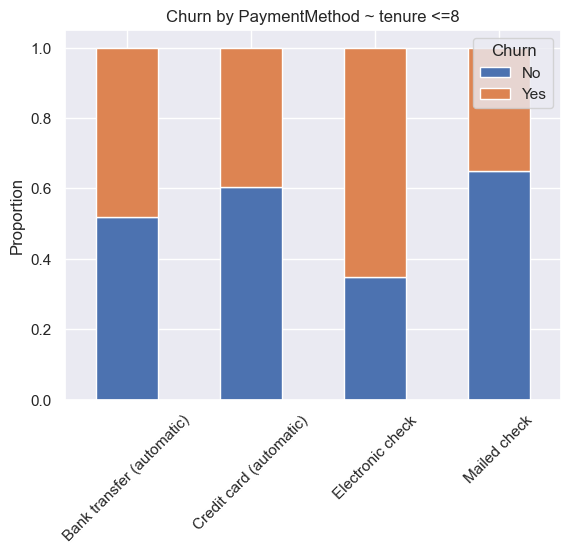

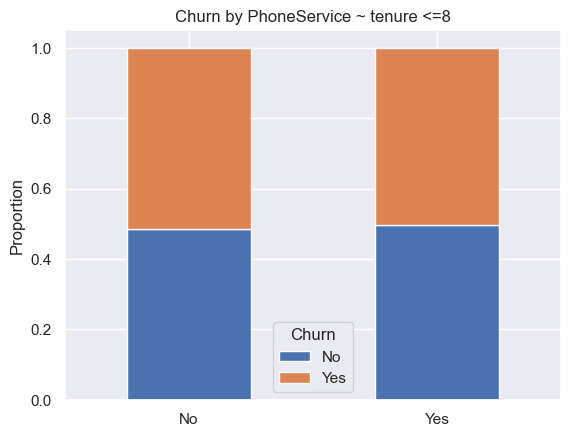

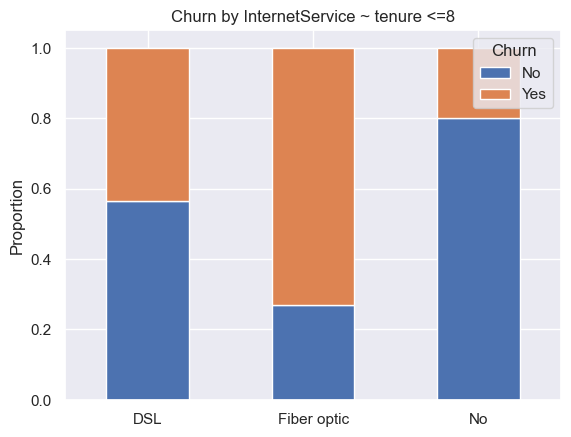

In [38]:
for col in ['gender','Partner','Dependents','SeniorCitizen','PaperlessBilling','PaymentMethod','PhoneService','InternetService']:
    data[data.tenure <= 8].groupby(col)['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.xticks(rotation=0 if col != 'PaymentMethod' else 45)
    plt.title(f'Churn by {col} ~ tenure <=8')
    plt.ylabel('Proportion')
    plt.xlabel('')

### 4.3.1 Correlation Churn by categorical variables ~ tenure <= 8 months

In [39]:
var_churn_list = []

for col in ['gender','Partner','Dependents','SeniorCitizen','PaperlessBilling','PaymentMethod','PhoneService','InternetService']:
    v,p = cramersv(data[data.tenure <= 8][col],data['Churn'])
    var_churn_list.append({'Variable':col,'CramersV':v.round(2),'p-value':p.round(4)})

var_churn_df = pd.DataFrame(var_churn_list).sort_values(by='CramersV',ascending=False).reset_index(drop=True)
print(var_churn_df)

           Variable  CramersV  p-value
0   InternetService      0.42   0.0000
1     PaymentMethod      0.28   0.0000
2  PaperlessBilling      0.25   0.0000
3     SeniorCitizen      0.16   0.0000
4        Dependents      0.13   0.0000
5           Partner      0.05   0.0548
6            gender      0.03   0.1701
7      PhoneService      0.01   0.8287


## 4.4 Distribution Churn by categorical variables with level no internet service ~ tenure <=8 months

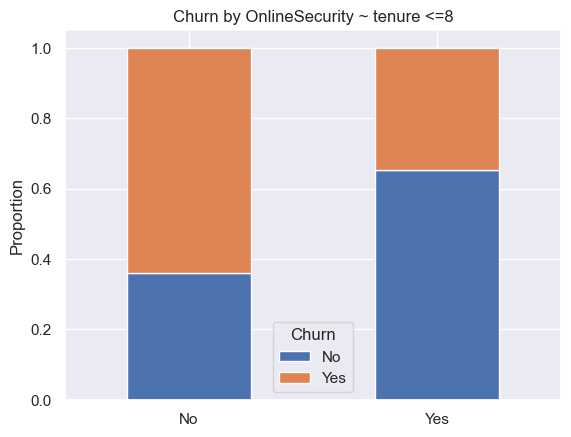

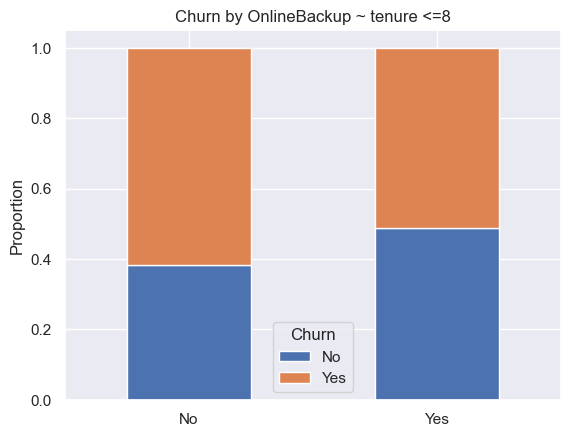

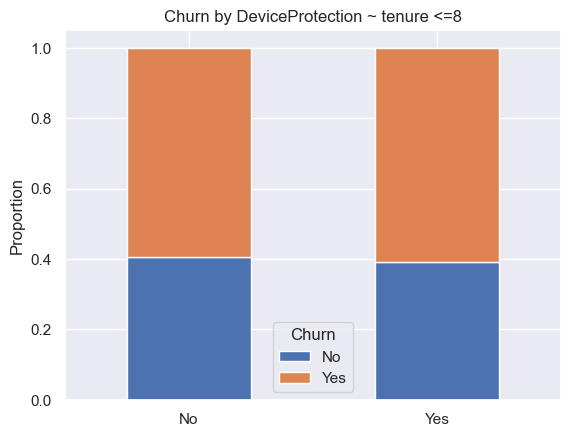

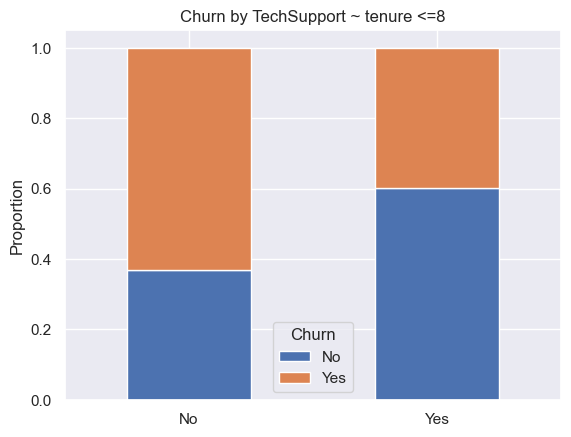

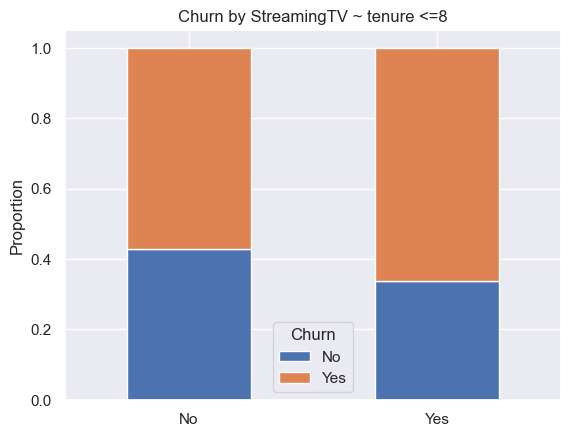

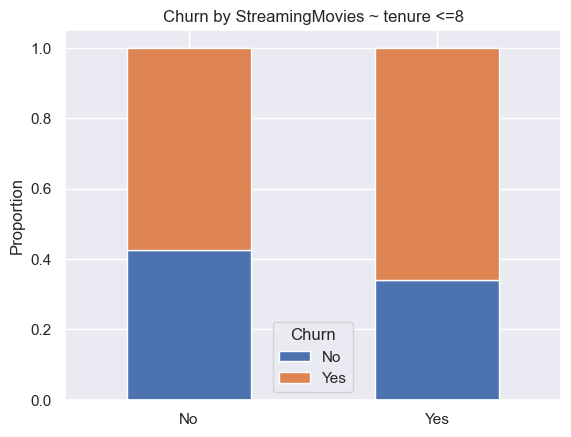

In [40]:
for col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    data[(data.InternetService != 'No') & (data.tenure <= 8)].groupby(col)['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.xticks(rotation=0 if col != 'PaymentMethod' else 45)
    plt.title(f'Churn by {col} ~ tenure <=8')
    plt.ylabel('Proportion')
    plt.xlabel('')

In [41]:
'''
#Image

fig, ax = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the 2D array of axes for easier indexing
axes = ax.flatten()

for i, col in enumerate(['InternetService', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']):
    col_groupby = data_filter.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    col_groupby.plot(kind='bar', stacked=True, ax=axes[i])
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proportion')
    axes[i].set_title(f'Churn by {col} ~ tenure <= 8 months')
    axes[i].legend(title='Churn', loc='lower right')
    axes[i].tick_params(axis='x', rotation=0)

fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

'''


"\n#Image\n\nfig, ax = plt.subplots(3, 2, figsize=(10, 10))\n\n# Flatten the 2D array of axes for easier indexing\naxes = ax.flatten()\n\nfor i, col in enumerate(['InternetService', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']):\n    col_groupby = data_filter.groupby(col)['Churn'].value_counts(normalize=True).unstack()\n    col_groupby.plot(kind='bar', stacked=True, ax=axes[i])\n    \n    axes[i].set_xlabel('')\n    axes[i].set_ylabel('Proportion')\n    axes[i].set_title(f'Churn by {col} ~ tenure <= 8 months')\n    axes[i].legend(title='Churn', loc='lower right')\n    axes[i].tick_params(axis='x', rotation=0)\n\nfig.delaxes(axes[-1])\n\n# Adjust layout for better spacing\nplt.tight_layout()\nplt.show()\n\n"

### 4.4.1 Correlation Churn by categorical variables with level not internet service ~ tenure <= 8 months

In [42]:
var_churn_list = []

for col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    v, p = cramersv(data[(data.tenure <= 8) & (data.InternetService != 'No')][col], 
                     data[(data.tenure <= 8) & (data.InternetService != 'No')]['Churn'])
    var_churn_list.append({'Variable':col,'CramersV':v.round(2),'p-value':p.round(4)})

var_churn_df = pd.DataFrame(var_churn_list).sort_values(by='CramersV',ascending=False).reset_index(drop=True)
print(var_churn_df)

           Variable  CramersV  p-value
0    OnlineSecurity      0.21   0.0000
1       TechSupport      0.17   0.0000
2      OnlineBackup      0.08   0.0031
3       StreamingTV      0.08   0.0031
4   StreamingMovies      0.08   0.0061
5  DeviceProtection      0.01   0.7486


# 5 Financial Aspects

## 5.1 Sum TotalCharges/TotalCharges

In [43]:
#Sum of TotalCharges
sum_total_charges = data.TotalCharges.sum()
print('sum total charges:',sum_total_charges.round())

#Sum of TotalCharges Churn = 'Yes'
sum_total_charges_churn_yes = data[data.Churn == 'Yes']['TotalCharges'].sum()
print('sum total charges churn yes:',sum_total_charges_churn_yes.round())

#Difference TotalCharges and TotalCharges Churn = 'Yes'
difference_totalcharges = sum_total_charges - sum_total_charges_churn_yes
print('difference total charges (churn yes):',difference_totalcharges.round())

total_charges_prop = sum_total_charges_churn_yes / sum_total_charges
print('prop total charges churn yes',total_charges_prop.round(2))

sum total charges: 16050465.0
sum total charges churn yes: 2857223.0
difference total charges (churn yes): 13193242.0
prop total charges churn yes 0.18


In [44]:
data.groupby(['Churn'])['MonthlyCharges'].agg(['mean','median','min','max']).round()

,mean,median,min,max
Churn,,,,
No,61.0,64.0,0.0,119.0
Yes,75.0,80.0,19.0,118.0


In [45]:
#Statistics MonhtlyCharges by Internet Service
data.groupby(['InternetService'])['MonthlyCharges'].agg(['mean','median','min','max']).round()

,mean,median,min,max
InternetService,,,,
DSL,58.0,56.0,0.0,95.0
Fiber optic,91.0,92.0,68.0,119.0
No,21.0,20.0,0.0,27.0


In [46]:
#Statistics monthlyCharges by Internet Service and Churn

data.groupby(['InternetService','Churn'])['MonthlyCharges'].agg(['mean','median','min','max']).round()

mean  median   min    max
InternetService Churn                           
DSL             No     60.0    60.0   0.0   95.0
                Yes    49.0    49.0  23.0   92.0
Fiber optic     No     94.0    95.0  69.0  119.0
                Yes    88.0    87.0  68.0  118.0
No              No     21.0    20.0   0.0   27.0
                Yes    20.0    20.0  19.0   26.0

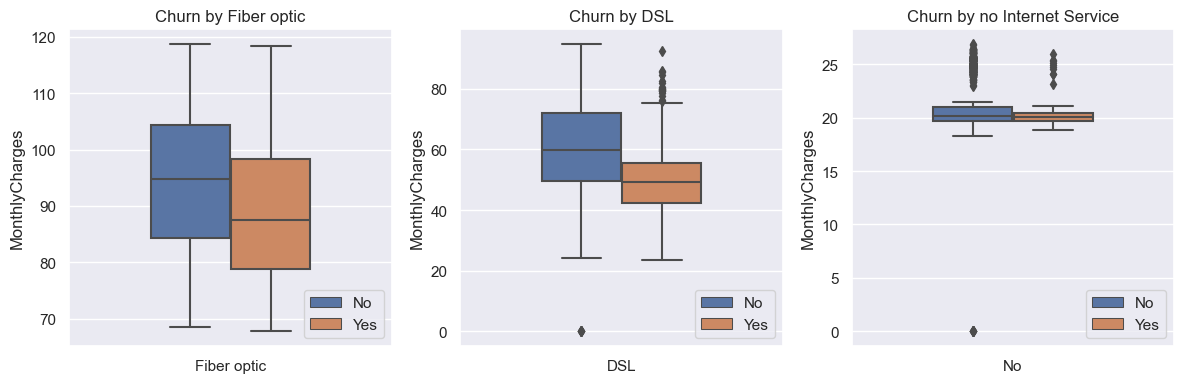

In [47]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
for i, service in enumerate(['Fiber optic','DSL','No']):
    sns.boxplot(data=data[data.InternetService == service],y='MonthlyCharges',x='InternetService',hue='Churn',ax=ax[i],width=0.5,hue_order=['No','Yes'])
    ax[i].set_title(f'Churn by {service}' if service != 'No' else 'Churn by no Internet Service')
    ax[i].set_xlabel('')
    ax[i].legend(loc='lower right')
    plt.tight_layout()

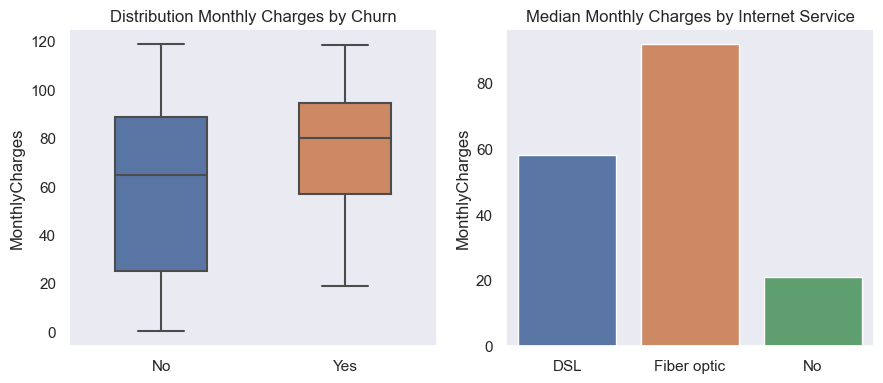

In [85]:
fig, ax = plt.subplots(1,2,figsize=(9,4))

#Distribution Monthly Charges by Churn
sns.boxplot(data=data,x='Churn',y='MonthlyCharges',width=0.5,ax=ax[0])
ax[0].set_title('Distribution Monthly Charges by Churn')
ax[0].set_xlabel('')
ax[0].grid('')


#Median monthlyCharges by Internet Service
sns.barplot(data=data, x='InternetService', y='MonthlyCharges',errorbar=None,ax=ax[1])
ax[1].set_title('Median Monthly Charges by Internet Service')
ax[1].set_xlabel('')
ax[1].grid('')

plt.tight_layout()
plt.show()


## 5.3 Mean/Distribution TotalCharges by InternetServivce among tenure

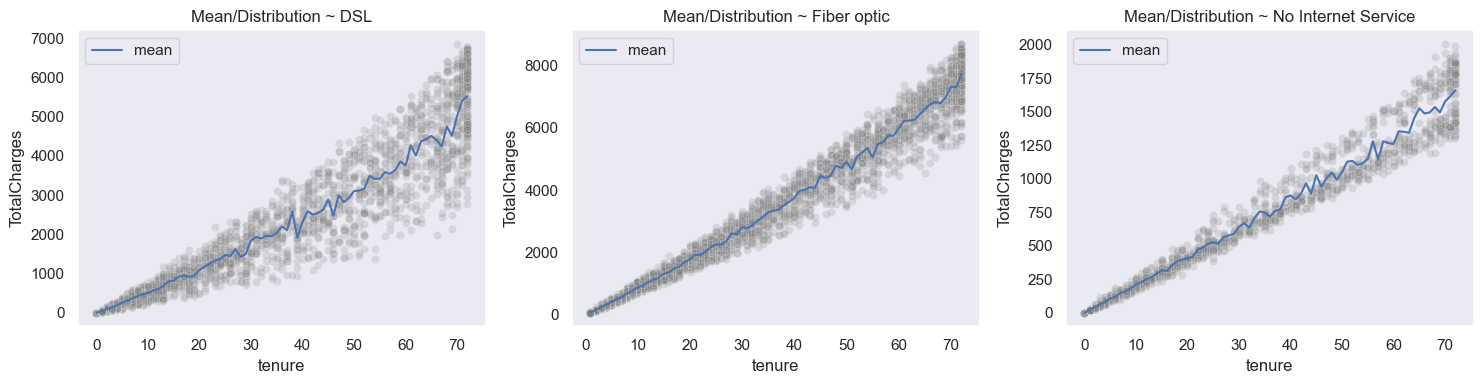

In [51]:
#Mean and Distribution of Total Charges among tenure

fig, ax = plt.subplots(1,3,figsize=(15,4))

#Subplot 1
data[data.InternetService == 'DSL'].groupby('tenure')['TotalCharges'].mean().plot(label='mean',ax=ax[0],title='Mean/Distribution ~ DSL')
sns.scatterplot(data=data[data.InternetService == 'DSL'],x='tenure',y='TotalCharges',alpha=0.2,ax=ax[0],color='grey')
ax[0].grid()

#Subplot 2
data[data.InternetService == 'Fiber optic'].groupby('tenure')['TotalCharges'].mean().plot(label='mean',ax=ax[1],title='Mean/Distribution ~ Fiber optic')
sns.scatterplot(data=data[data.InternetService == 'Fiber optic'],x='tenure',y='TotalCharges',alpha=0.2,ax=ax[1],color='grey')
ax[1].grid()

#Subplot 3
data[data.InternetService == 'No'].groupby('tenure')['TotalCharges'].mean().plot(label='mean',ax=ax[2],title='Mean/Distribution ~ No Internet Service')
sns.scatterplot(data=data[data.InternetService == 'No'],x='tenure',y='TotalCharges',alpha=0.2,ax=ax[2],color='grey')
ax[2].grid()

plt.tight_layout()
plt.show()

## 5.4 Mean/Distribution MonthlyCharges by InternetService among tenure

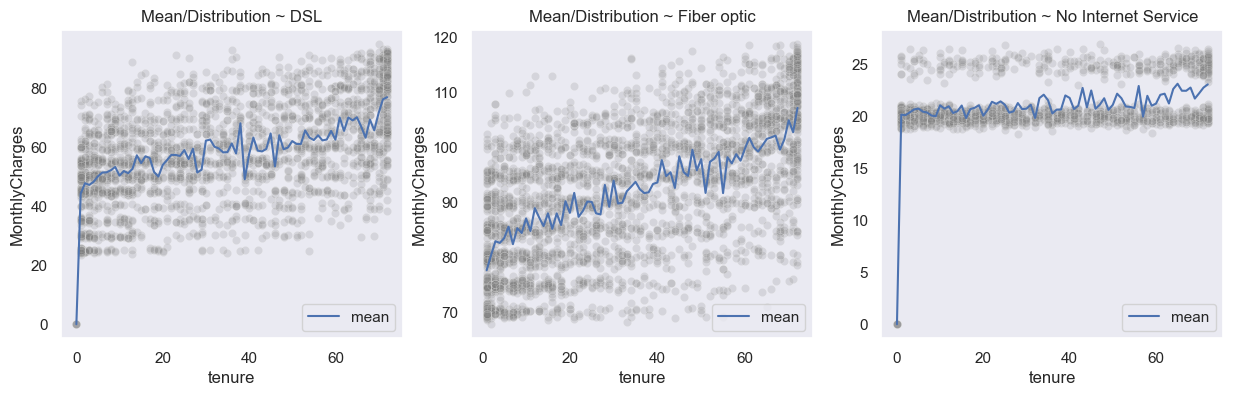

In [52]:
#Mean and Distribution of Monthly Charges among tenure

fig, ax = plt.subplots(1,3,figsize=(15,4))

#Subplot 1
data[data.InternetService == 'DSL'].groupby('tenure')['MonthlyCharges'].mean().plot(label='mean',ax=ax[0],title='Mean/Distribution ~ DSL')
sns.scatterplot(data=data[data.InternetService == 'DSL'],x='tenure',y='MonthlyCharges',alpha=0.2,ax=ax[0],color='grey')
ax[0].grid()

#Subplot 2
data[data.InternetService == 'Fiber optic'].groupby('tenure')['MonthlyCharges'].mean().plot(label='mean',ax=ax[1],title='Mean/Distribution ~ Fiber optic')
sns.scatterplot(data=data[data.InternetService == 'Fiber optic'],x='tenure',y='MonthlyCharges',alpha=0.2,ax=ax[1], color='grey')
ax[1].grid()
ax[1].legend(loc='lower right')

#Subplot 3
data[data.InternetService == 'No'].groupby('tenure')['MonthlyCharges'].mean().plot(label='mean',ax=ax[2],title='Mean/Distribution ~ No Internet Service')
sns.scatterplot(data=data[data.InternetService == 'No'],x='tenure',y='MonthlyCharges',alpha=0.2,ax=ax[2], color='grey')
ax[2].grid()

In [53]:
#sns.scatterplot(data=data[data.InternetService == 'No'],x='tenure',y='MonthlyCharges',hue='MultipleLines')